In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from pathlib import Path
from torch.utils.data import DataLoader

from torchfitter.trainer import Trainer
from torchfitter.utils import DataWrapper
from torchfitter.regularization import L1Regularization

from sklearn.model_selection import train_test_split

torch.manual_seed(0)
np.random.seed(0)

In [3]:
DATA_PATH = Path(os.path.abspath('')).parent / "tests/data"

In [4]:
X = np.load(DATA_PATH / "features.npy")
y = np.load(DATA_PATH / "labels.npy")

y = y.reshape(-1,1)

In [5]:
# simplest case of cross-validation
X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=0.33, 
    random_state=42
)

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
model = nn.Linear(in_features=1, out_features=1)
model.to(device)

regularizer = L1Regularization(regularization_rate=0.01, biases=False)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

In [8]:
from torchfitter.callbacks import LoggerCallback, EarlyStopping, LearningRateScheduler

In [9]:
callbacks = [
    LoggerCallback(update_step=100),
    EarlyStopping(patience=50, load_best=False),
    LearningRateScheduler(
        scheduler=optim.lr_scheduler.StepLR(optimizer, step_size=500, gamma=0.9)
    )
]

In [10]:
trainer = Trainer(
    model=model, 
    criterion=criterion,
    optimizer=optimizer, 
    regularizer=regularizer,
    device=device,
    callbacks=callbacks
)

In [11]:
# wrap data in Dataset
train_wrapper = DataWrapper(
    X_train, 
    y_train, 
    dtype_X='float', 
    dtype_y='float'
)
val_wrapper = DataWrapper(
    X_val,
    y_val,
    dtype_X='float',
    dtype_y='float'
)

# torch Loaders
train_loader = DataLoader(train_wrapper, batch_size=64, pin_memory=True)
val_loader = DataLoader(val_wrapper, batch_size=64, pin_memory=True)

----

In [12]:
from torchfitter.callbacks import ExperimentSaver
from torchfitter.callbacks.base import ManagerCallback

In [13]:
from torchfitter.manager import Manager

In [14]:
callbacks_manager = [
    ExperimentSaver(checkpoint_path='checkpoint.pt', folder_name='experiment')
]

In [15]:
# define random seeds
seeds = (0, 5, 10)

manager = Manager(
    trainer=trainer,
    seeds=seeds,
    callbacks=callbacks_manager
)

In [16]:
manager.run_experiments(train_loader, val_loader, 500) # n_epochs set for demonstration purposes only

INFO:root:Starting training process on cuda


  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

INFO:root:End of training. Total time: 45.35811 seconds
INFO:root:Ending training on seed 0
INFO:root:Starting training process on cuda


  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

INFO:root:End of training. Total time: 42.91614 seconds
INFO:root:Ending training on seed 5
INFO:root:Starting training process on cuda


  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

  0%|          | 0/17 | ? batch/s, time_remaining: ? s

INFO:root:End of training. Total time: 51.45871 seconds
INFO:root:Ending training on seed 10


In [17]:
from torchfitter.io import load_pickle

In [18]:
experiments = {}

for seed in seeds:
    mod = torch.load(f'experiment_{seed}/model_parameters.pt')
    best = torch.load(f'experiment_{seed}/best_parameters.pt')
    op = torch.load(f'experiment_{seed}/optim_parameters.pt')
    hist = load_pickle(f'experiment_{seed}/history.pkl')
    
    experiments[seed] = {}
    
    experiments[seed]['model'] = mod
    experiments[seed]['best_model'] = best
    experiments[seed]['optimizer'] = op
    experiments[seed]['history'] = hist

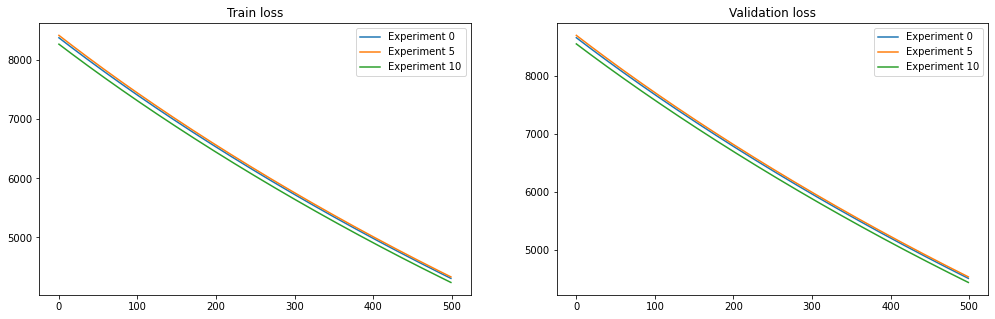

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))

for key in experiments.keys():
    hist = experiments[key]['history']
    
    ax[0].plot(hist['train_loss'], label=f'Experiment {key}')
    ax[0].set_title('Train loss')
    ax[0].legend()
    
    ax[1].plot(hist['validation_loss'], label=f'Experiment {key}')
    ax[1].set_title('Validation loss')
    ax[1].legend()

----

In [20]:
experiments[0]['model']

OrderedDict([('weight', tensor([[25.9128]], device='cuda:0')),
             ('bias', tensor([-4.3514], device='cuda:0'))])

In [21]:
experiments[0]['best_model']

OrderedDict([('weight', tensor([[25.9128]], device='cuda:0')),
             ('bias', tensor([-4.3514], device='cuda:0'))])

---

In [22]:
experiments[5]['model']

OrderedDict([('weight', tensor([[25.7207]], device='cuda:0')),
             ('bias', tensor([-4.3280], device='cuda:0'))])

In [23]:
experiments[5]['best_model']

OrderedDict([('weight', tensor([[25.7207]], device='cuda:0')),
             ('bias', tensor([-4.3280], device='cuda:0'))])

----

In [24]:
experiments[10]['model']

OrderedDict([('weight', tensor([[26.4456]], device='cuda:0')),
             ('bias', tensor([-4.3864], device='cuda:0'))])

In [25]:
experiments[10]['best_model']

OrderedDict([('weight', tensor([[26.4456]], device='cuda:0')),
             ('bias', tensor([-4.3864], device='cuda:0'))])